In [3]:
import numpy as np
from google.colab import drive
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import silhouette_score

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_folder_car = '/content/drive/My Drive/Image Analysis/imageset3/car/'
image_folder_face = '/content/drive/My Drive/Image Analysis/imageset3/face/'

In [6]:
# Load images from a folder and assign a label
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize images to a consistent size
        img = img.astype('float32') / 255.0  # Normalize pixel values
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)


In [7]:
# Load car and face images
car_images, car_labels = load_images_from_folder(image_folder_car, 0)  # Label 0 for cars
face_images, face_labels = load_images_from_folder(image_folder_face, 1)  # Label 1 for faces

# Combine car and face images
images = np.concatenate((car_images, face_images), axis=0)
labels = np.concatenate((car_labels, face_labels), axis=0)

In [8]:
# Extract features using a pre-trained CNN
def extract_features(images):
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    features = model.predict(preprocess_input(images))
    return features

# Extract features from images
features = extract_features(images)

13/13 [==============================] - 224s 17s/step


In [9]:
# Standardize the feature matrix
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

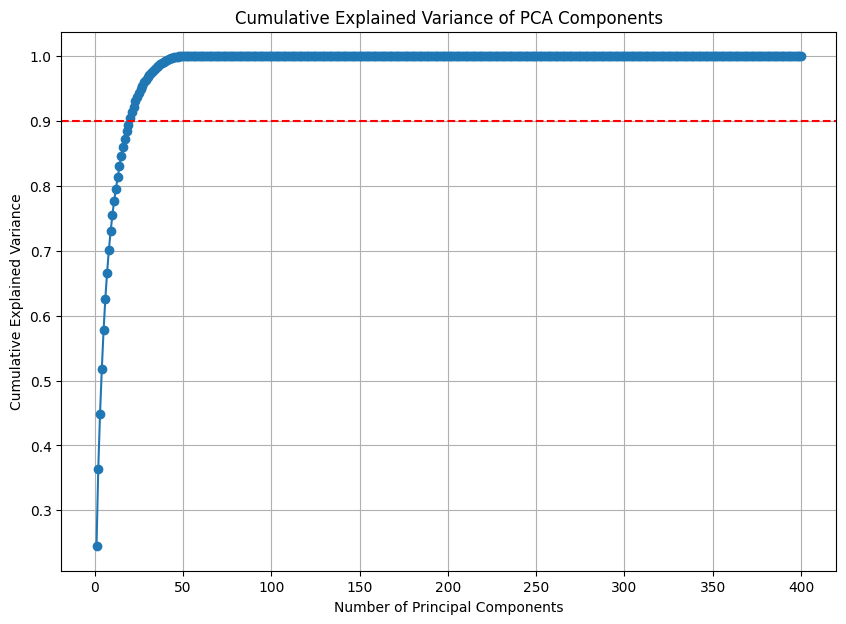

Number of PCA components needed to retain at least 90% of variance: 20


In [10]:
# Dimensionality Reduction using PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Determine the number of PCA components needed to retain at least 90% of variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1

# Plot cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the number of components needed to retain at least 90% of variance
print(f"Number of PCA components needed to retain at least 90% of variance: {n_components}")


In [11]:
# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
features_pca_optimal = pca_optimal.fit_transform(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

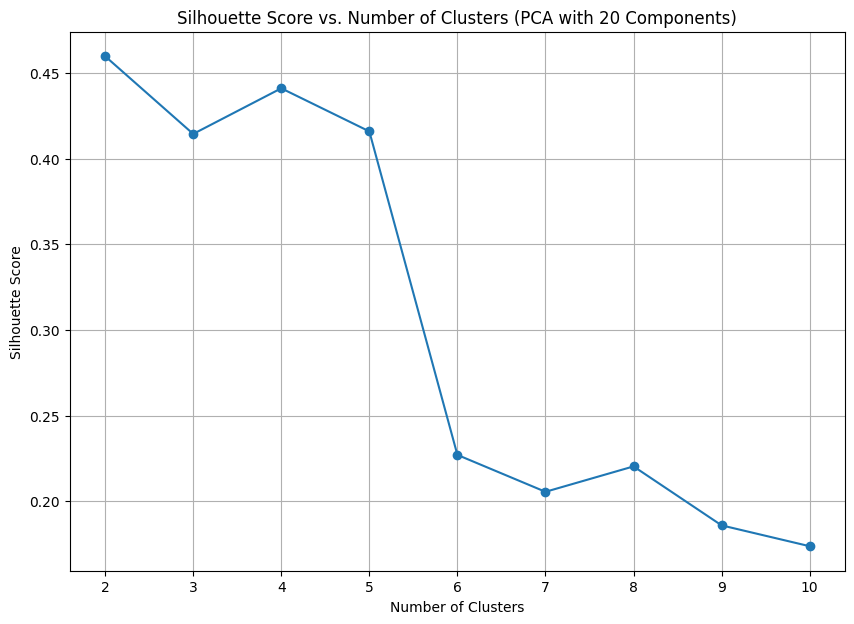

Optimal number of clusters based on silhouette score: 2


In [12]:
# Define range for number of clusters
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters
silhouette_scores = []

for num_clusters in cluster_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(features_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_pca, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (PCA with 20 Components)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print the optimal number of clusters based on silhouette score
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

In [13]:
# Define the number of clusters for which you want to compute the silhouette score
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(features_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(features_pca, kmeans_labels)
print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.45971009135246277


In [14]:
# Apply K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(features_pca_optimal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Print clustering labels
print("K-Means clustering labels:", kmeans_labels)

K-Means clustering labels: [0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


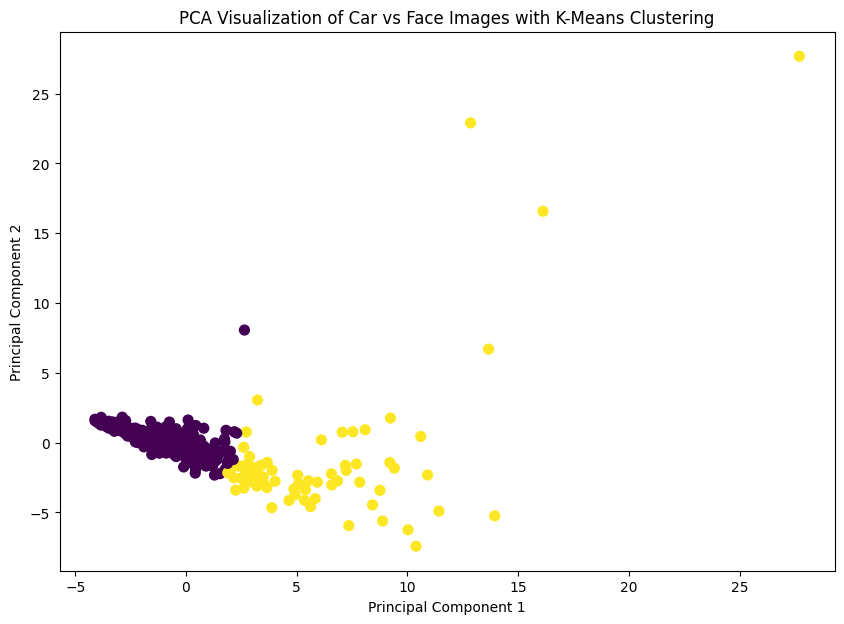

In [16]:
# Plot PCA results with K-Means clustering
plt.figure(figsize=(10, 7))
plt.scatter(features_pca_optimal[:, 0], features_pca_optimal[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('PCA Visualization of Car vs Face Images with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

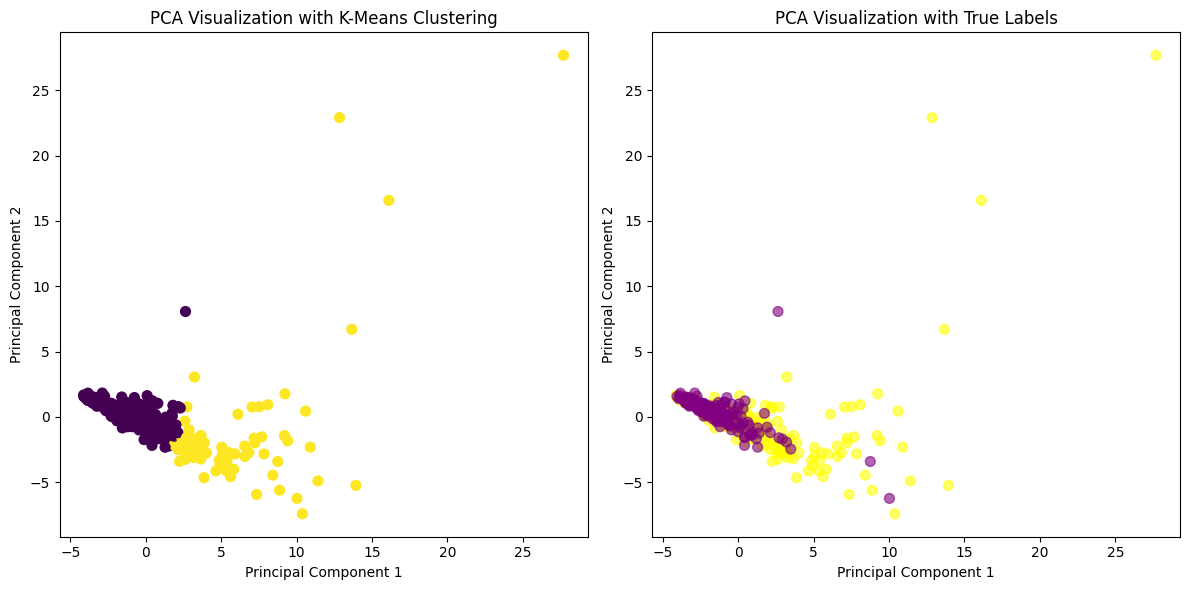

In [17]:
# Apply K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Specify n_init to suppress warning
kmeans_labels = kmeans.fit_predict(features_pca_optimal)

# Define colors for true labels
colors = np.array(['yellow', 'purple'])
true_colors = colors[labels]

# Plot PCA results with K-Means clustering
plt.figure(figsize=(12, 6))

# Plot K-Means clustering results
plt.subplot(1, 2, 1)
plt.scatter(features_pca_optimal[:, 0], features_pca_optimal[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('PCA Visualization with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot PCA results with True Labels
plt.subplot(1, 2, 2)
plt.scatter(features_pca_optimal[:, 0], features_pca_optimal[:, 1], c=true_colors, s=50, alpha=0.6)
plt.title('PCA Visualization with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()